# Laboratorio 03 - MLFlow y Feast

* Curso: Machine Learning
* Integrantes: 
  - Javier Alvarado
  - Renatto Guzm√°n

## Ejercicio 01

In [1]:
%pip install mlflow
%pip install feast
%pip install scikit-learn
%pip install pandas numpy matplotlib seaborn

     ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.8 MB 1.4 MB/s eta 0:00:07
     ---------------------------------------- 0.1/8.8 MB 656.4 kB/s eta 0:00:14
     ---------------------------------------- 0.1/8.8 MB 871.5 kB/s eta 0:00:10
      --------------------------------------- 0.2/8.8 MB 1.1 MB/s eta 0:00:08
     - -------------------------------------- 0.2/8.8 MB 1.0 MB/s eta 0:00:09
     -- ------------------------------------- 0.5/8.8 MB 1.8 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/8.8 MB 2.0 MB/s eta 0:00:05
     ---- ----------------------------------- 1.0/8.8 MB 2.7 MB/s eta 0:00:03
     ------ --------------------------------- 1.4/8.8 MB 3.5 MB/s eta 0:00:03
     --------- ------------------------------ 2.1/8.8 MB 4.5 MB/s eta 0:00:02
     --------------- ------------------------ 3.3/8.8 MB 6.7 MB/s eta 0:00:01
     -------------------- ------------------- 4.4/8.8 MB 8.0 MB/s e


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\rentt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.7 MB 660.6 kB/s eta 0:00:12
     ---------------------------------------- 0.1/7.7 MB 770.8 kB/s eta 0:00:10
     ---------------------------------------- 0.1/7.7 MB 655.4 kB/s eta 0:00:12
     - -------------------------------------- 0.2/7.7 MB 1.0 MB/s eta 0:00:08
     - -------------------------------------- 0.3/7.7 MB 1.1 MB/s eta 0:00:07
     -- ------------------------------------- 0.5/7.7 MB 1.7 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/7.7 MB 2.1 MB/s eta 0:00:04
     ----- ---------------------------------- 1.0/7.7 MB 2.8 MB/s eta 0:00:03
     -------- ------------------------------- 1.5/7.7 MB 3.6 MB/s eta 0:00:02
     ----------- ---------------------------- 2.2/7.7 MB 4.6 MB/s eta 0:00:02
     ---------------- ----------------------- 3.2/7.7 MB 6.1 MB/s eta 0:00:01
     ---------------------- ----------------- 4.4/7.7 MB 7.7 MB/s

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mcp 1.16.0 requires pydantic<3.0.0,>=2.11.0, but you have pydantic 2.10.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
fastmcp 2.12.5 requires pydantic[email]>=2.11.7, but you have pydantic 2.10.6 which is incompatible.
captum 0.8.0 requires numpy<2.0, but you have numpy 2.2.6 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\rentt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\rentt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\rentt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Verificaci√≥n de instalaci√≥n de MLflow y Feast

# TODO: Importar librer√≠as necesarias
import mlflow
import feast

# TODO: Imprimir versiones de mlflow y feast
print("Versi√≥n de MLflow:", mlflow.__version__)
print("Versi√≥n de Feast:", feast.__version__)


Versi√≥n de MLflow: 3.5.0
Versi√≥n de Feast: 0.55.0


## Ejercicio 02

In [3]:
# Ejercicio 2 - Carga y Exploraci√≥n de Datos

# 2.1 Carga del Dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)

df['MedHouseVal'] = california.target

print("Primeras 5 filas del dataset:")
print(df.head())
print("\nInformaci√≥n b√°sica del dataset:")
print(f"Forma del dataset: {df.shape}")
print("\nTipos de datos:")
print(df.dtypes)


Primeras 5 filas del dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Informaci√≥n b√°sica del dataset:
Forma del dataset: (20640, 9)

Tipos de datos:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


üìä Estad√≠sticas descriptivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  

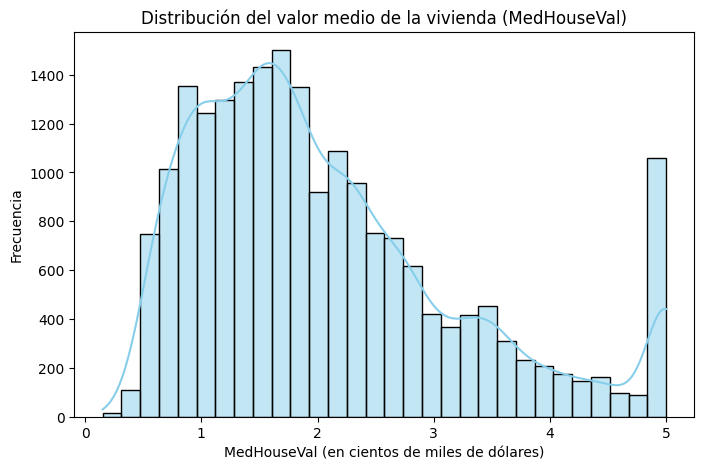

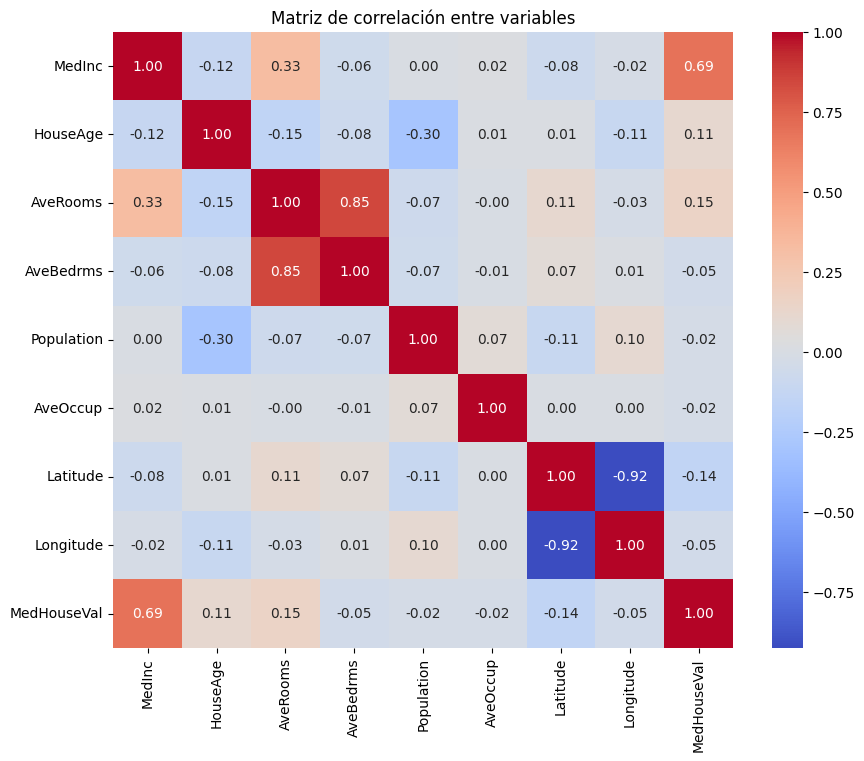

In [4]:
# Ejercicio 2.2 - An√°lisis Exploratorio

import matplotlib.pyplot as plt
import seaborn as sns

print("üìä Estad√≠sticas descriptivas:")
print(df.describe())

print("\nüîç Valores faltantes por columna:")
print(df.isnull().sum())

plt.figure(figsize=(8, 5))
sns.histplot(df['MedHouseVal'], kde=True, bins=30, color='skyblue')
plt.title("Distribuci√≥n del valor medio de la vivienda (MedHouseVal)")
plt.xlabel("MedHouseVal (en cientos de miles de d√≥lares)")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaci√≥n entre variables")
plt.show()


## Ejercicio 03

In [5]:
# Ejercicio 3 - Preparaci√≥n de Datos

from sklearn.model_selection import train_test_split

# 3.1 Divisi√≥n de Datos
# TODO: Separar features (X) y target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# TODO: Dividir en train y test con random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tama√±o de X_train:", X_train.shape)
print("Tama√±o de X_test:", X_test.shape)
print("Tama√±o de y_train:", y_train.shape)
print("Tama√±o de y_test:", y_test.shape)


# 3.2 Feature Engineering
# TODO: Crear features derivadas
X_train = X_train.copy()
X_test = X_test.copy()

X_train['rooms_per_household'] = X_train['AveRooms'] / X_train['HouseAge']
X_train['rooms_per_population'] = X_train['AveRooms'] / X_train['AveOccup']
X_train['bedrooms_per_room'] = X_train['AveBedrms'] / X_train['AveRooms']

X_test['rooms_per_household'] = X_test['AveRooms'] / X_test['HouseAge']
X_test['rooms_per_population'] = X_test['AveRooms'] / X_test['AveOccup']
X_test['bedrooms_per_room'] = X_test['AveBedrms'] / X_test['AveRooms']

# TODO: Actualizar los conjuntos de entrenamiento y prueba
print("\n‚úÖ Nuevas columnas a√±adidas:")
print([col for col in X_train.columns if col not in df.columns])

print("\nüìè Nuevo tama√±o de X_train:", X_train.shape)
print("üìè Nuevo tama√±o de X_test:", X_test.shape)


Tama√±o de X_train: (16512, 8)
Tama√±o de X_test: (4128, 8)
Tama√±o de y_train: (16512,)
Tama√±o de y_test: (4128,)

‚úÖ Nuevas columnas a√±adidas:
['rooms_per_household', 'rooms_per_population', 'bedrooms_per_room']

üìè Nuevo tama√±o de X_train: (16512, 11)
üìè Nuevo tama√±o de X_test: (4128, 11)


## Ejercicio 04

In [8]:
# Configure MLflow para realizar tracking de experimentos.
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Configurar tracking local (puede ser una carpeta)
mlflow.set_tracking_uri("file:./mlruns")

# Crear experimento si no existe
experiment_name = "california-housing-prediction"
mlflow.set_experiment(experiment_name)

# Funci√≥n para entrenar y registrar modelos en MLflow
def train_and_log_model(model, model_name, X_train, y_train, X_test, y_test):
    with mlflow.start_run(run_name=model_name):
        # Entrenar modelo
        model.fit(X_train, y_train)

        # Predicciones
        y_pred = model.predict(X_test)

        # Calcular m√©tricas
        rmse = root_mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Log de m√©tricas
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)

        # Log de par√°metros (si tiene)
        if hasattr(model, "get_params"):
            mlflow.log_params(model.get_params())

        # Registrar el modelo
        mlflow.sklearn.log_model(model, model_name)

        print(f"‚úÖ Modelo {model_name} registrado en MLflow con √©xito.")
        print(f"   RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {r2:.4f}")

# Entrenar los 3 modelos
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

train_and_log_model(lr_model, "LinearRegression", X_train, y_train, X_test, y_test)
train_and_log_model(rf_model, "RandomForest", X_train, y_train, X_test, y_test)
train_and_log_model(gb_model, "GradientBoosting", X_train, y_train, X_test, y_test)


2025/10/19 13:57:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 13:57:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


‚úÖ Modelo LinearRegression registrado en MLflow con √©xito.
   RMSE: 0.6754 | MAE: 0.4861 | R2: 0.6519


2025/10/19 13:57:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 13:57:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


‚úÖ Modelo RandomForest registrado en MLflow con √©xito.
   RMSE: 0.5113 | MAE: 0.3322 | R2: 0.8005


2025/10/19 13:57:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 13:57:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


‚úÖ Modelo GradientBoosting registrado en MLflow con √©xito.
   RMSE: 0.5406 | MAE: 0.3710 | R2: 0.7770


## Ejercicio 05

In [ ]:
# !feast init california_feature_store


Creating a new Feast repository in c:\Users\rentt\Desktop\Universidad\5to A√±o\Machine Learning Engineering\Lab03-MLFeast\california_feature_store.



In [ ]:
# import pandas as pd
# from datetime import datetime
# import os

# # Aseg√∫rate que tienes el DataFrame df del ejercicio 2
# data = df.copy()
# data["house_id"] = data.index  # Feast necesita una entidad
# data["event_timestamp"] = datetime.now()

# # Crear carpeta data dentro de Feast si no existe
# os.makedirs("california_feature_store/data", exist_ok=True)

# # Guardar a parquet
# data.to_parquet("california_feature_store/data/california_data.parquet", index=False)

# print("‚úÖ Dataset guardado en formato Parquet para Feast.")


‚úÖ Dataset guardado en formato Parquet para Feast.


In [ ]:
# !cd california_feature_store
# !feast apply

Can't find feature repo configuration file at c:\Users\rentt\Desktop\Universidad\5to A√±o\Machine Learning Engineering\Lab03-MLFeast\feature_store.yaml. Make sure you're running feast from an initialized feast repository.


In [ ]:
# !feast materialize-incremental $(Get-Date)


Can't find feature repo configuration file at c:\Users\rentt\Desktop\Universidad\5to A√±o\Machine Learning Engineering\Lab03-MLFeast\feature_store.yaml. Make sure you're running feast from an initialized feast repository.
